In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 

movies = movies.merge(credits, on='title')
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

movies.dropna(inplace=True)
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)
movies['crew'] = movies['crew'].apply(fetch_director)

movies['cast'] = movies['cast'].apply(lambda x: x[:3])

movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new['tags'] = new['tags'].apply(lambda x: " ".join(x))

cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(new['tags']).toarray()

similarity = cosine_similarity(vector)

def recommend(movie):
    index = new[new['title'] == movie].index
    if len(index) > 0:
        index = index[0]
        distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x: x[1])
        for i in distances[1:11]:
            print(new.iloc[i[0]]['title'])
    else:
        print("Movie not found in database.")

recommend('Gandhi')

pickle.dump(new, open('movie_list.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))

Gandhi, My Father
The Wind That Shakes the Barley
A Passage to India
Guiana 1838
Ramanujan
Bloody Sunday
Mr. Turner
Rang De Basanti
Wah-Wah
Goodbye Bafana


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib (from versions: none)
ERROR: No matching distribution found for matplotlib


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seaborn (from versions: none)
ERROR: No matching distribution found for seaborn


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Extract all genres from the dataset
all_genres = [genre for sublist in movies['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Plot the distribution of genres
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement wordcloud (from versions: none)
ERROR: No matching distribution found for wordcloud


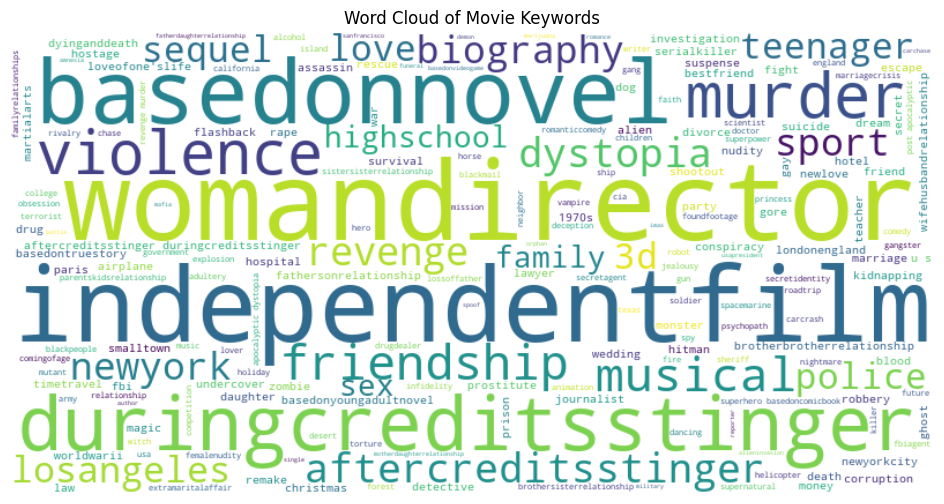

In [ ]:
from wordcloud import WordCloud

# Combine all keywords into a single string
all_keywords = " ".join([" ".join(keywords) for keywords in movies['keywords']])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Keywords')
plt.show()

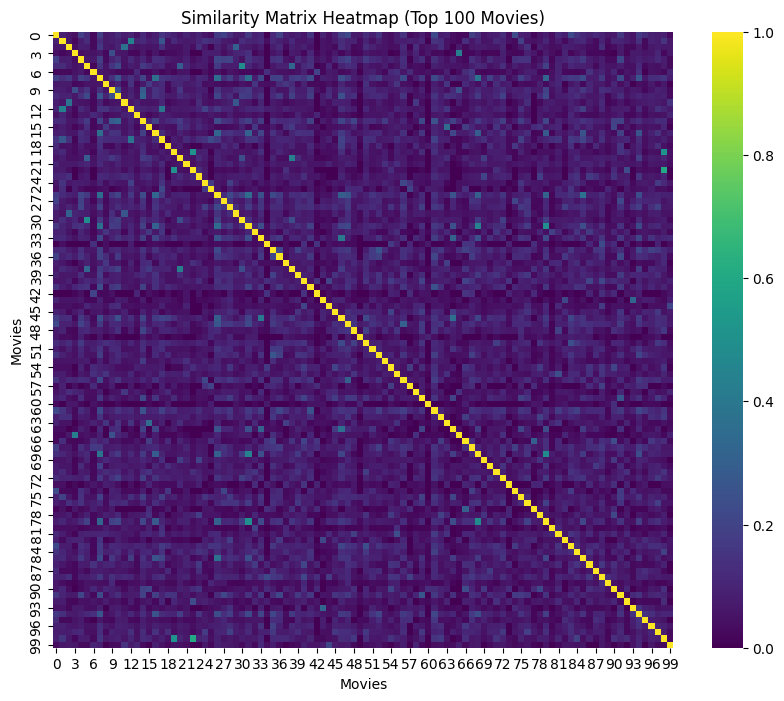

In [ ]:
small_similarity = similarity[:100, :100]

plt.figure(figsize=(10, 8))
sns.heatmap(small_similarity, cmap='viridis')
plt.title('Similarity Matrix Heatmap (Top 100 Movies)')
plt.xlabel('Movies')
plt.ylabel('Movies')
plt.show()

C:\Users\abhir\AppData\Local\Temp\ipykernel_3384\3381378022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommended_titles, y=[dist[1] for dist in distances], palette='viridis')


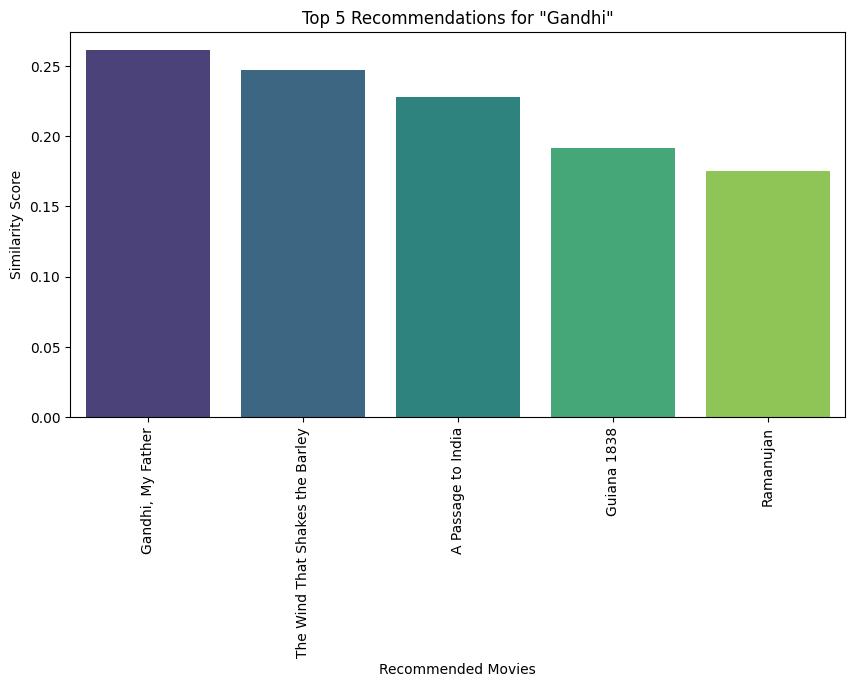

In [ ]:
def plot_recommendations(movie, num_recommendations=5):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])[1:num_recommendations+1]
    
    recommended_titles = [new.iloc[i[0]].title for i in distances]
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=recommended_titles, y=[dist[1] for dist in distances], palette='viridis')
    plt.title(f'Top {num_recommendations} Recommendations for "{movie}"')
    plt.xlabel('Recommended Movies')
    plt.ylabel('Similarity Score')
    plt.xticks(rotation=90)
    plt.show()

# Example usage
plot_recommendations('Gandhi', num_recommendations=5)

In [ ]:
import pandas as pd

# Assuming your dataset is in a DataFrame called 'df'
# Count the number of null values in each column
null_counts = movies.isnull().sum()

# If you want the total count of null values in the entire DataFrame
total_null_count = movies.isnull().sum().sum()

print("Null value counts per column:")
print(null_counts)
print("\nTotal number of null values in the DataFrame:", total_null_count)

Null value counts per column:
movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
tags        0
dtype: int64

Total number of null values in the DataFrame: 0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column for which you want to plot the distribution and boxplot

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(movies[movie_id], kde=True, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel("tags")
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies[movie_id], color='lightgreen')
plt.title('Boxplot')
plt.xlabel("tags")
plt.show()

NameError: name 'movie_id' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

# Load datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Merge datasets
movies = movies.merge(credits, on='title')

# Preprocess data
def convert(text):
    return [i['name'] for i in ast.literal_eval(text)]

def fetch_director(text):
    return [i['name'] for i in ast.literal_eval(text) if i['job'] == 'Director']

def collapse(L):
    return [i.replace(" ", "") for i in L]

movies.dropna(inplace=True)
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(lambda x: convert(x)[:3])
movies['crew'] = movies['crew'].apply(fetch_director)

movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies['overview'] = movies['overview'].apply(lambda x: x.split())

movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
new = movies.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew'])
new['tags'] = new['tags'].apply(lambda x: " ".join(x))

# Feature extraction
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(new['tags']).toarray()
similarity = cosine_similarity(vector)

# Recommendation function
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_movies = [new.iloc[i[0]].title for i in distances[1:6]]
    return recommended_movies

# Evaluation functions
def evaluate_recommendations(recommended, actual):
    y_true = [1 if movie in actual else 0 for movie in recommended]
    y_pred = [1] * len(recommended)
    if len(actual) == 0:
        return 0.0, 0.0, 0.0  # Avoid ill-defined metric warnings
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    return precision, recall, f1

# Example usage
movie = 'The Lego Movie'
recommended_movies = recommend(movie)
actual_movies = ['The Lego Batman Movie', 'Toy Story', 'Toy Story 3', 'The Incredibles', 'Monsters, Inc.']  # Example actual relevant movies for evaluation

precision, recall, f1 = evaluate_recommendations(recommended_movies, actual_movies)
precision, recall, f1


(0.0, 1.0, 0.0)

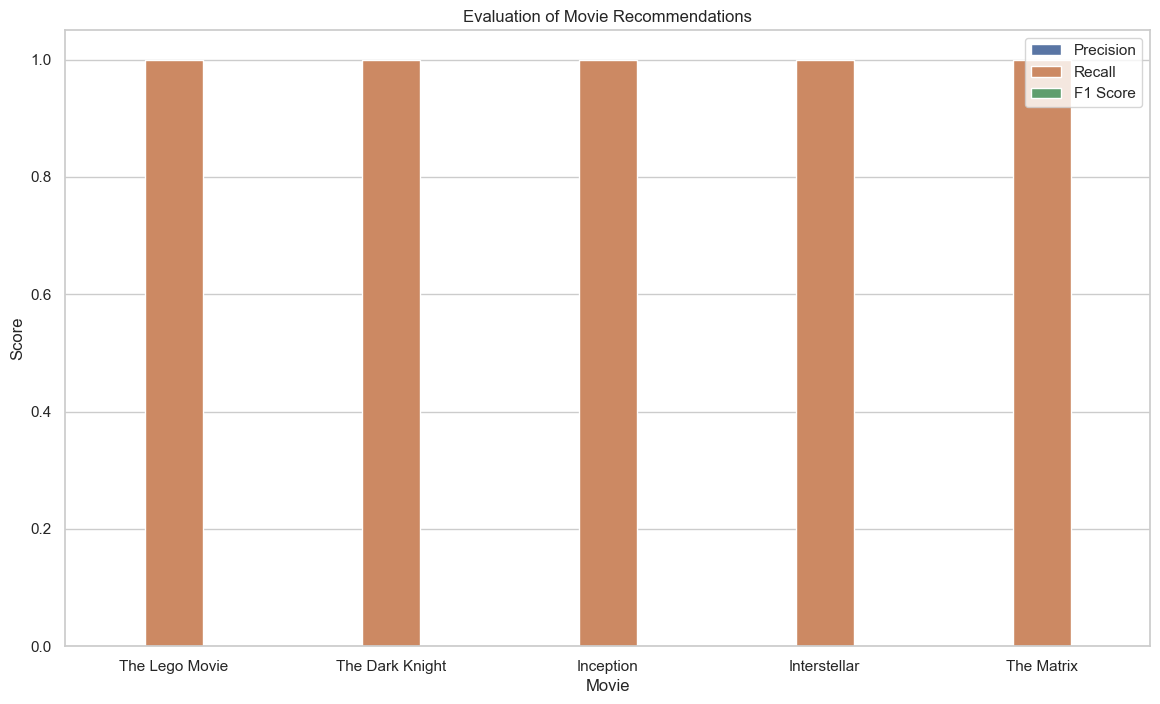

In [ ]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

# Load datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Merge datasets
movies = movies.merge(credits, on='title')

# Preprocess data
def convert(text):
    return [i['name'] for i in ast.literal_eval(text)]

def fetch_director(text):
    return [i['name'] for i in ast.literal_eval(text) if i['job'] == 'Director']

def collapse(L):
    return [i.replace(" ", "") for i in L]

movies.dropna(inplace=True)
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(lambda x: convert(x)[:3])
movies['crew'] = movies['crew'].apply(fetch_director)

movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies['overview'] = movies['overview'].apply(lambda x: x.split())

movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
new = movies.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew'])
new['tags'] = new['tags'].apply(lambda x: " ".join(x))

# Feature extraction
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(new['tags']).toarray()
similarity = cosine_similarity(vector)

# Recommendation function
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_movies = [new.iloc[i[0]].title for i in distances[1:6]]
    return recommended_movies

# Evaluation functions
def evaluate_recommendations(recommended, actual):
    y_true = [1 if movie in actual else 0 for movie in recommended]
    y_pred = [1] * len(recommended)
    if len(actual) == 0:
        return 0.0, 0.0, 0.0  # Avoid ill-defined metric warnings
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    return precision, recall, f1

# List of movies to evaluate
movies_to_evaluate = ['The Lego Movie', 'The Dark Knight', 'Inception', 'Interstellar', 'The Matrix']

# Example actual relevant movies for evaluation
actual_relevant_movies = {
    'The Lego Movie': ['The Lego Batman Movie', 'Toy Story', 'Toy Story 3', 'The Incredibles', 'Monsters, Inc.'],
    'The Dark Knight': ['The Dark Knight Rises', 'Batman Begins', 'Batman v Superman: Dawn of Justice', 'Joker', 'Justice League'],
    'Inception': ['Interstellar', 'The Prestige', 'Shutter Island', 'Memento', 'Tenet'],
    'Interstellar': ['Inception', 'The Martian', 'Gravity', '2001: A Space Odyssey', 'Contact'],
    'The Matrix': ['The Matrix Reloaded', 'The Matrix Revolutions', 'Inception', 'Blade Runner', 'Ghost in the Shell']
}

# Collect metrics
metrics = {'Movie': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for movie in movies_to_evaluate:
    recommended_movies = recommend(movie)
    actual_movies = actual_relevant_movies[movie]
    precision, recall, f1 = evaluate_recommendations(recommended_movies, actual_movies)
    metrics['Movie'].append(movie)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
metrics_melted = metrics_df.melt(id_vars='Movie', var_name='Metric', value_name='Score')
sns.barplot(x='Movie', y='Score', hue='Metric', data=metrics_melted)
plt.title('Evaluation of Movie Recommendations')
plt.xlabel('Movie')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()
